In [1]:
%matplotlib notebook
import numpy as np

import dyrect as dy
from dyrect.data_generators import lemniscate, lorenz_attractor
from dyrect.drawing import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


(52, 2)


<IPython.core.display.Javascript object>


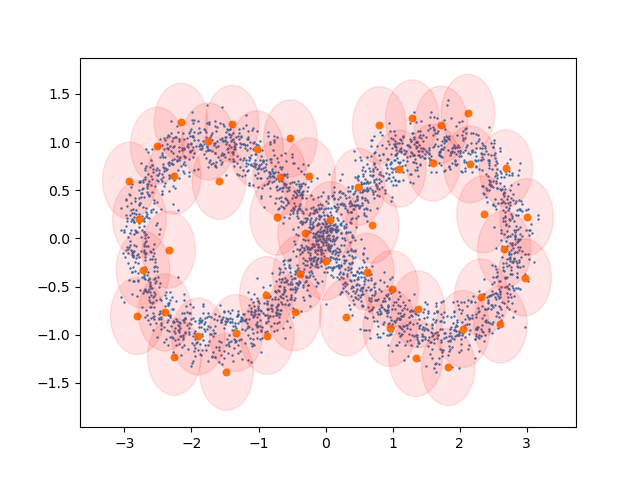

In [2]:
points = lemniscate(3000, scale=2., step=0.26, noise=0.15)

eps=0.4
EN = dy.EpsilonNet(eps, 0)
dists = EN.fit(points)
lms = EN.landmarks
print(lms.shape)

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(points[:,0],points[:,1], s=0.5)
plt.scatter(lms[:,0],lms[:,1], s=21.9)

for lm in lms:
    crc = plt.Circle(lm, eps, color='r', alpha=0.1)
    ax.add_patch(crc)

In [3]:
TM = dy.TransitionMatrix(lms, eps)
transitions = TM.fit(points)
prob_matrix = dy.trans2prob(transitions)

<IPython.core.display.Javascript object>


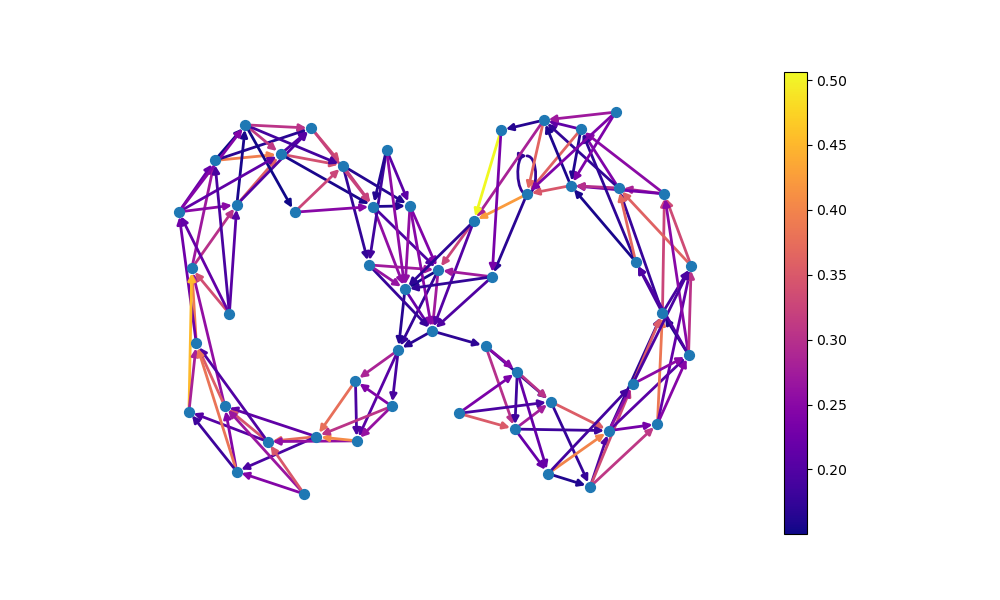

In [4]:
# Questions: 
# how to count transitions? if point is in the intersection of balls, should it contribute to both? 
# if it maps to the the intersection, it should be counted twice? it may create fake backward loops
draw_transition_graph(prob_matrix, lms, threshold=0.15)
plt.show()

<IPython.core.display.Javascript object>


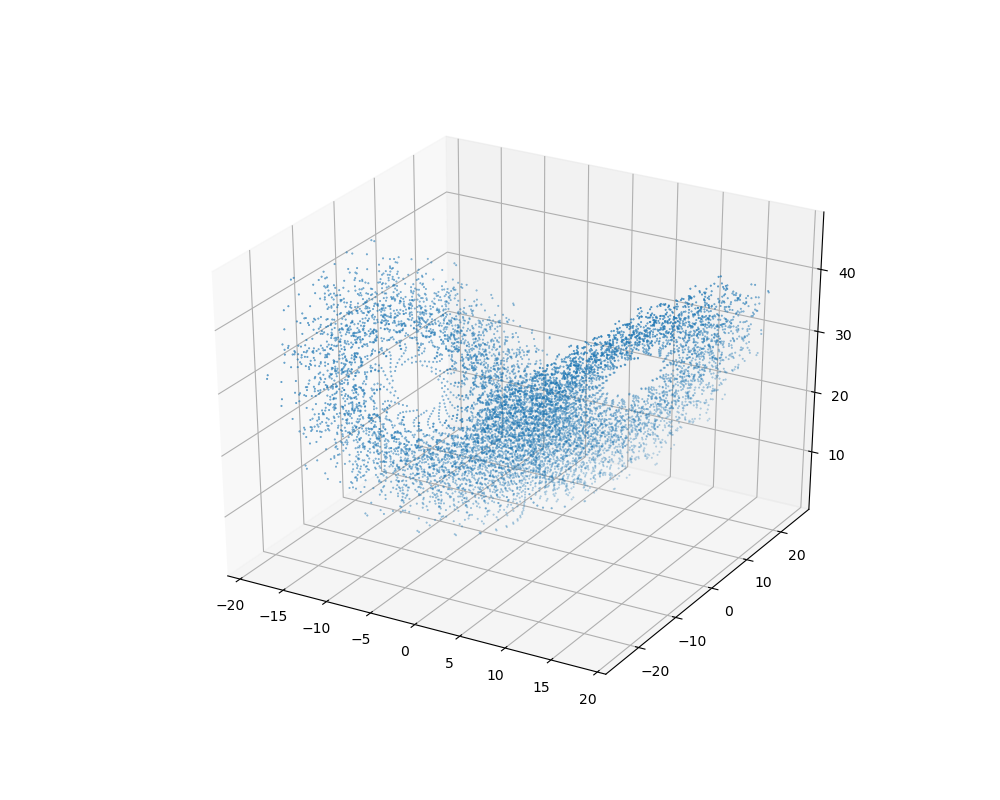

In [5]:
points = lorenz_attractor(10000, step=0.01, adaptive_step=True)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.2)

<IPython.core.display.Javascript object>


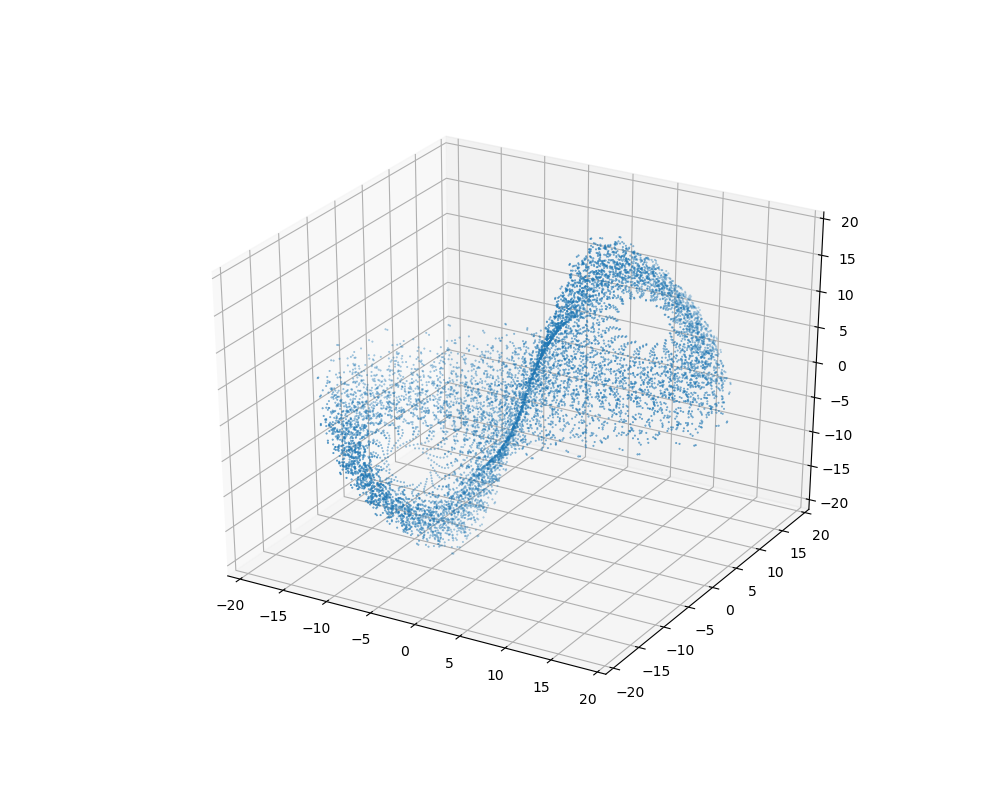

In [6]:
emb_lorenz = dy.embedding(points[:,0], 3, 2)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(emb_lorenz[:,0], emb_lorenz[:,1], emb_lorenz[:,2], s=0.2)
fig.savefig('lorenz_z.pds', format='pdf')

(294, 3)


<IPython.core.display.Javascript object>


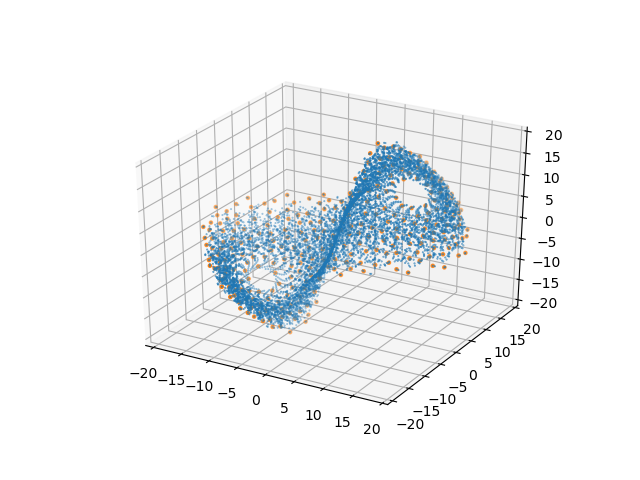

In [7]:
eps=1.5
EN = dy.EpsilonNet(eps, 0)
EN.fit(emb_lorenz)
lms = EN.landmarks
print(lms.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(emb_lorenz[:,0], emb_lorenz[:,1], emb_lorenz[:,2], s=0.2)
ax.scatter(lms[:,0], lms[:,1], lms[:,2], s=5.2)


<IPython.core.display.Javascript object>


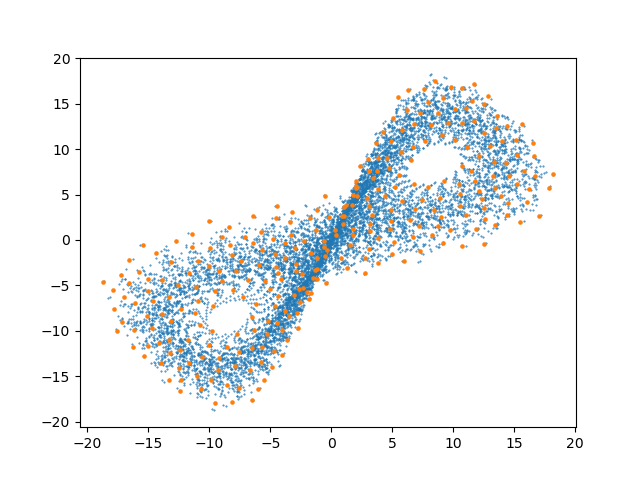

In [8]:
fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
plt.scatter(emb_lorenz[:,0], emb_lorenz[:,1], s=0.2)
plt.scatter(lms[:,0], lms[:,1], s=5.2)

<IPython.core.display.Javascript object>


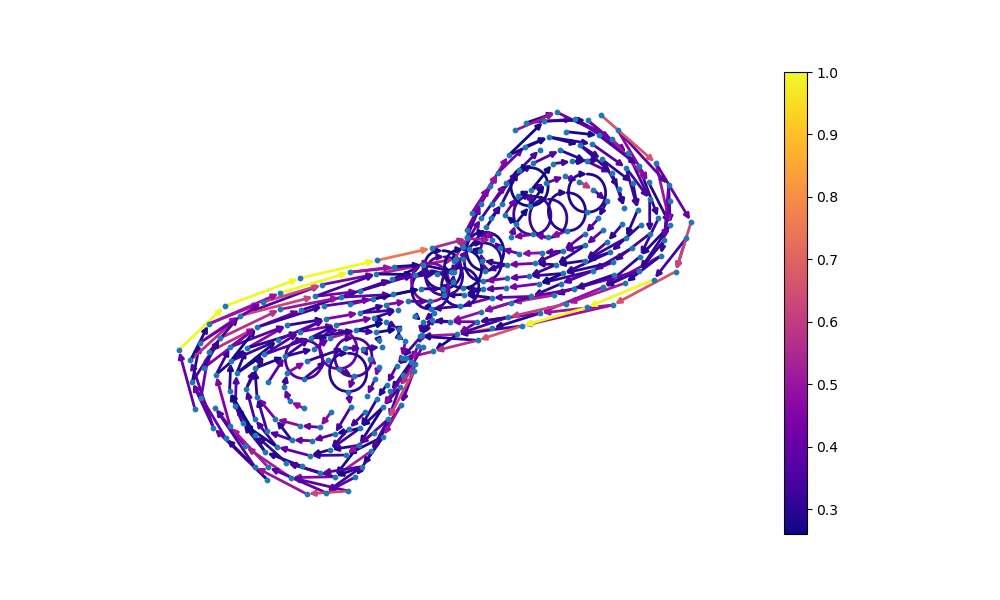

In [9]:
TM = dy.TransitionMatrix(lms, eps)
transitions = TM.fit(emb_lorenz)
prob_matrix = dy.trans2prob(transitions)

# Questions: 
# how to count transitions? if point is in the intersection of balls, should it contribute to both? 
# if it maps to the the intersection, it should be counted twice? it may create fake backward loops
draw_transition_graph(prob_matrix, lms, threshold=0.26, node_size=10, edge_size=8)
plt.show()

## Future prediction

In [10]:
np.random.seed(0)
random.seed(0)

train_points = lorenz_attractor(100000, step=0.01, adaptive_step=False, starting_point=[1.,1.,1.])
test_points = lorenz_attractor(5000, step=0.01, adaptive_step=False, starting_point=[-1.,-1.,1.])

eps=3.2
EN = dy.EpsilonNet(eps, 0)
dists = EN.fit(train_points)
lms = EN.landmarks
print(lms.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train_points[:,0], train_points[:,1], train_points[:,2], s=0.2)
ax.scatter(lms[:,0], lms[:,1], lms[:,2], s=7.2)

NameError: name 'dy' is not defined

In [ ]:
seer = dy.Seer(train_points, lms, eps)
nc = dy.NerveComplex(lms, eps, 3, train_points)

In [ ]:
t0 = 3960
t1 = t0 + 15
tpredict = 150
# t0 = 1993
# t1 = t0 + 10
# tpredict = 100
prediction = seer.predict(test_points[t0:t1], tpredict)

seer.draw_prediction()
seer.draw_hom_grouped_prediction(nc, steps=[39, 55, tpredict-1], prediction=prediction)